# Laboratory Exercises #1

In [1]:
library(ggplot2)
library(gridExtra)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



## Ex1 - Vectors and DataFrames

In [8]:
# vectors for lake's name and parameters 
lakes      <- c('Loch Ness', 'Loch Lomond', 'Loch Morar', 'Loch Tay',
                'Loch Awe', 'Loch Maree', 'Loch Ericht', 'Locht Lochy', 
                'Loch Rannoch', 'Loch Shiel', 'Loch Katrine', 'Loch Arkaig', 
                'Loch Shin' ) 
volume     <- c(7.45, 2.6, 2.3, 1.6, 1.2, 1.09, 1.08, 1.07, 0.97, 0.79, 0.77, 0.75, 0.35) 
area       <- c(56, 71, 27, 26.4, 39, 28.6, 18.6, 16, 19, 19.5, 12.4, 16, 22.5) 
len     <- c(39, 36, 18.8, 23, 41, 20, 23, 16, 15.7, 28, 12.9, 19.3, 27.8) 
max_depth  <- c(230, 190, 310, 150, 94, 114, 156, 162, 134, 128, 151, 109, 49) 
mean_depth <- c(132, 37, 87, 60.6, 32, 38, 57.6, 70, 51, 40, 43.4, 46.5, 15.5)

In [37]:
scottish.lakes <- data.frame( volume, area, len, max_depth, mean_depth, row.names = lakes, stringsAsFactors = FALSE)

print(scottish.lakes)

             volume area  len max_depth mean_depth
Loch Ness      7.45 56.0 39.0       230      132.0
Loch Lomond    2.60 71.0 36.0       190       37.0
Loch Morar     2.30 27.0 18.8       310       87.0
Loch Tay       1.60 26.4 23.0       150       60.6
Loch Awe       1.20 39.0 41.0        94       32.0
Loch Maree     1.09 28.6 20.0       114       38.0
Loch Ericht    1.08 18.6 23.0       156       57.6
Locht Lochy    1.07 16.0 16.0       162       70.0
Loch Rannoch   0.97 19.0 15.7       134       51.0
Loch Shiel     0.79 19.5 28.0       128       40.0
Loch Katrine   0.77 12.4 12.9       151       43.4
Loch Arkaig    0.75 16.0 19.3       109       46.5
Loch Shin      0.35 22.5 27.8        49       15.5


In [51]:
cat('Max volume lake:', rownames(scottish.lakes)[which.max(scottish.lakes[['volume']])], '\n')
cat('Max area lake:', rownames(scottish.lakes)[which.max(scottish.lakes[['area']])], '\n')
cat('Min volume lake:', rownames(scottish.lakes)[which.min(scottish.lakes[['volume']])], '\n')
cat('Min volume lake:', rownames(scottish.lakes)[which.min(scottish.lakes[['area']])], '\n')

Max volume lake: Loch Ness 
Max area lake: Loch Lomond 
Min volume lake: Loch Shin 
Min volume lake: Loch Katrine 


In [65]:
scottish.lakes_sorted = scottish.lakes[order(scottish.lakes[['area']], decreasing = TRUE), ]
print(scottish.lakes_sorted)
cat("2 largest lakes:", rownames(scottish.lakes_sorted)[1], ',\t', rownames(scottish.lakes_sorted)[2])

             volume area  len max_depth mean_depth
Loch Lomond    2.60 71.0 36.0       190       37.0
Loch Ness      7.45 56.0 39.0       230      132.0
Loch Awe       1.20 39.0 41.0        94       32.0
Loch Maree     1.09 28.6 20.0       114       38.0
Loch Morar     2.30 27.0 18.8       310       87.0
Loch Tay       1.60 26.4 23.0       150       60.6
Loch Shin      0.35 22.5 27.8        49       15.5
Loch Shiel     0.79 19.5 28.0       128       40.0
Loch Rannoch   0.97 19.0 15.7       134       51.0
Loch Ericht    1.08 18.6 23.0       156       57.6
Locht Lochy    1.07 16.0 16.0       162       70.0
Loch Arkaig    0.75 16.0 19.3       109       46.5
Loch Katrine   0.77 12.4 12.9       151       43.4
2 largest lakes: Loch Lomond ,	 Loch Ness

In [67]:
cat('total scottish area covered by water:',sum(scottish.lakes[['area']]))

total scottish area covered by water: 372

## Ex 2 - Crude Oil Production

In [68]:
df <- read.csv2('crude-oil-prices.csv', sep=',', dec='.',header=T)

colnames(df)[4] = 'prices'
str(df)
print(df)

'data.frame':	160 obs. of  4 variables:
 $ Entity: chr  "World" "World" "World" "World" ...
 $ Code  : chr  "OWID_WRL" "OWID_WRL" "OWID_WRL" "OWID_WRL" ...
 $ Year  : int  1861 1862 1863 1864 1865 1866 1867 1868 1869 1870 ...
 $ prices: num  0.49 1.05 3.15 8.06 6.59 3.74 2.41 3.63 3.64 3.86 ...
    Entity     Code Year    prices
1    World OWID_WRL 1861   0.49000
2    World OWID_WRL 1862   1.05000
3    World OWID_WRL 1863   3.15000
4    World OWID_WRL 1864   8.06000
5    World OWID_WRL 1865   6.59000
6    World OWID_WRL 1866   3.74000
7    World OWID_WRL 1867   2.41000
8    World OWID_WRL 1868   3.63000
9    World OWID_WRL 1869   3.64000
10   World OWID_WRL 1870   3.86000
11   World OWID_WRL 1871   4.34000
12   World OWID_WRL 1872   3.64000
13   World OWID_WRL 1873   1.83000
14   World OWID_WRL 1874   1.17000
15   World OWID_WRL 1875   1.35000
16   World OWID_WRL 1876   2.56000
17   World OWID_WRL 1877   2.42000
18   World OWID_WRL 1878   1.19000
19   World OWID_WRL 1879   0.86000
20  

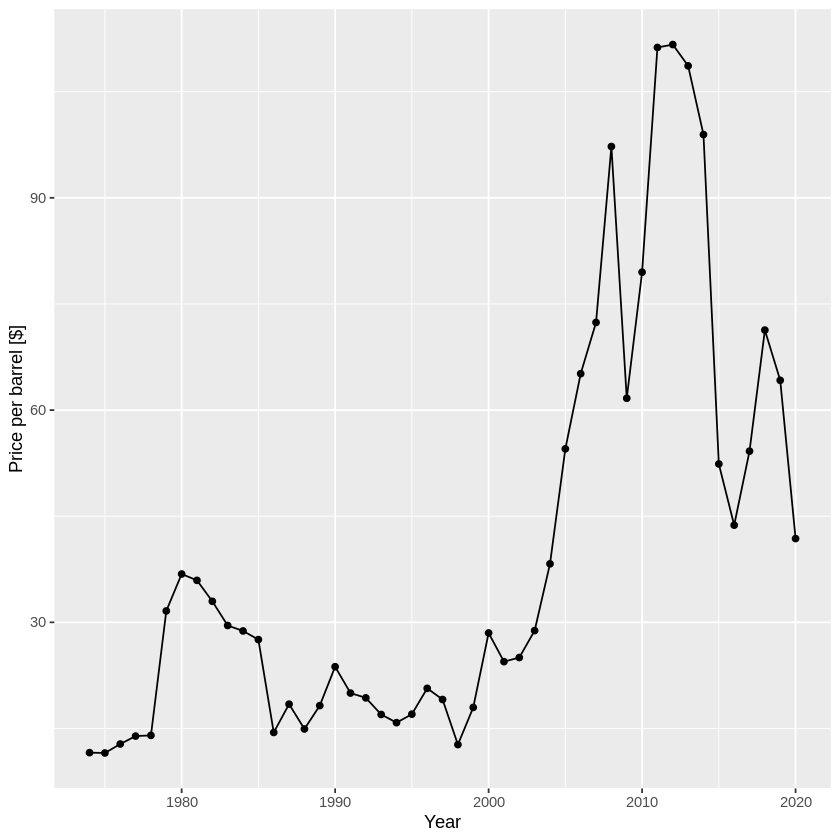

In [30]:


ggplot(df[df['prices'] > 10,], aes(Year, prices)) + 
  geom_point() + ylab('Price per barrel [$]') +
  geom_path()

# try with filter or select to select prices over 40

In [34]:
high_price <- max(df$prices)

cat('The highest price in history is', max(df$prices), '[$/barrel] and occured in', df[df['prices'] == high_price][3])

The highest price in history is 111.6697 [$/barrel] and occured in 2012

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


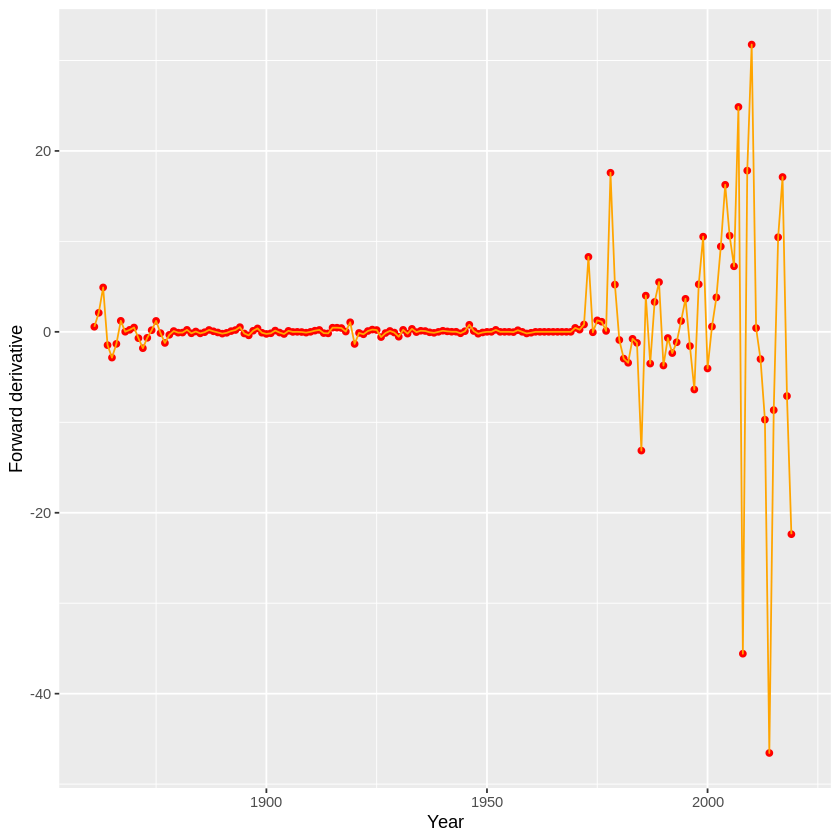

In [49]:
len = length(df$prices)
df['derivative'] = c(df$prices[2:len] - df$prices[1:len-1], NA)


ggplot(df, aes(Year, derivative)) + 
  geom_point(color='red') + ylab('Forward derivative') +
  geom_path(color='orange')

## Ex 3 - World Coal Production

In [3]:
dtibble <- as_tibble(read.csv('coal-production-by-country.csv', sep=',', dec='.',header=T))
colnames(dtibble)

[1] "Entity"                "Code"                  "Year"                 
[4] "Coal.production..TWh."

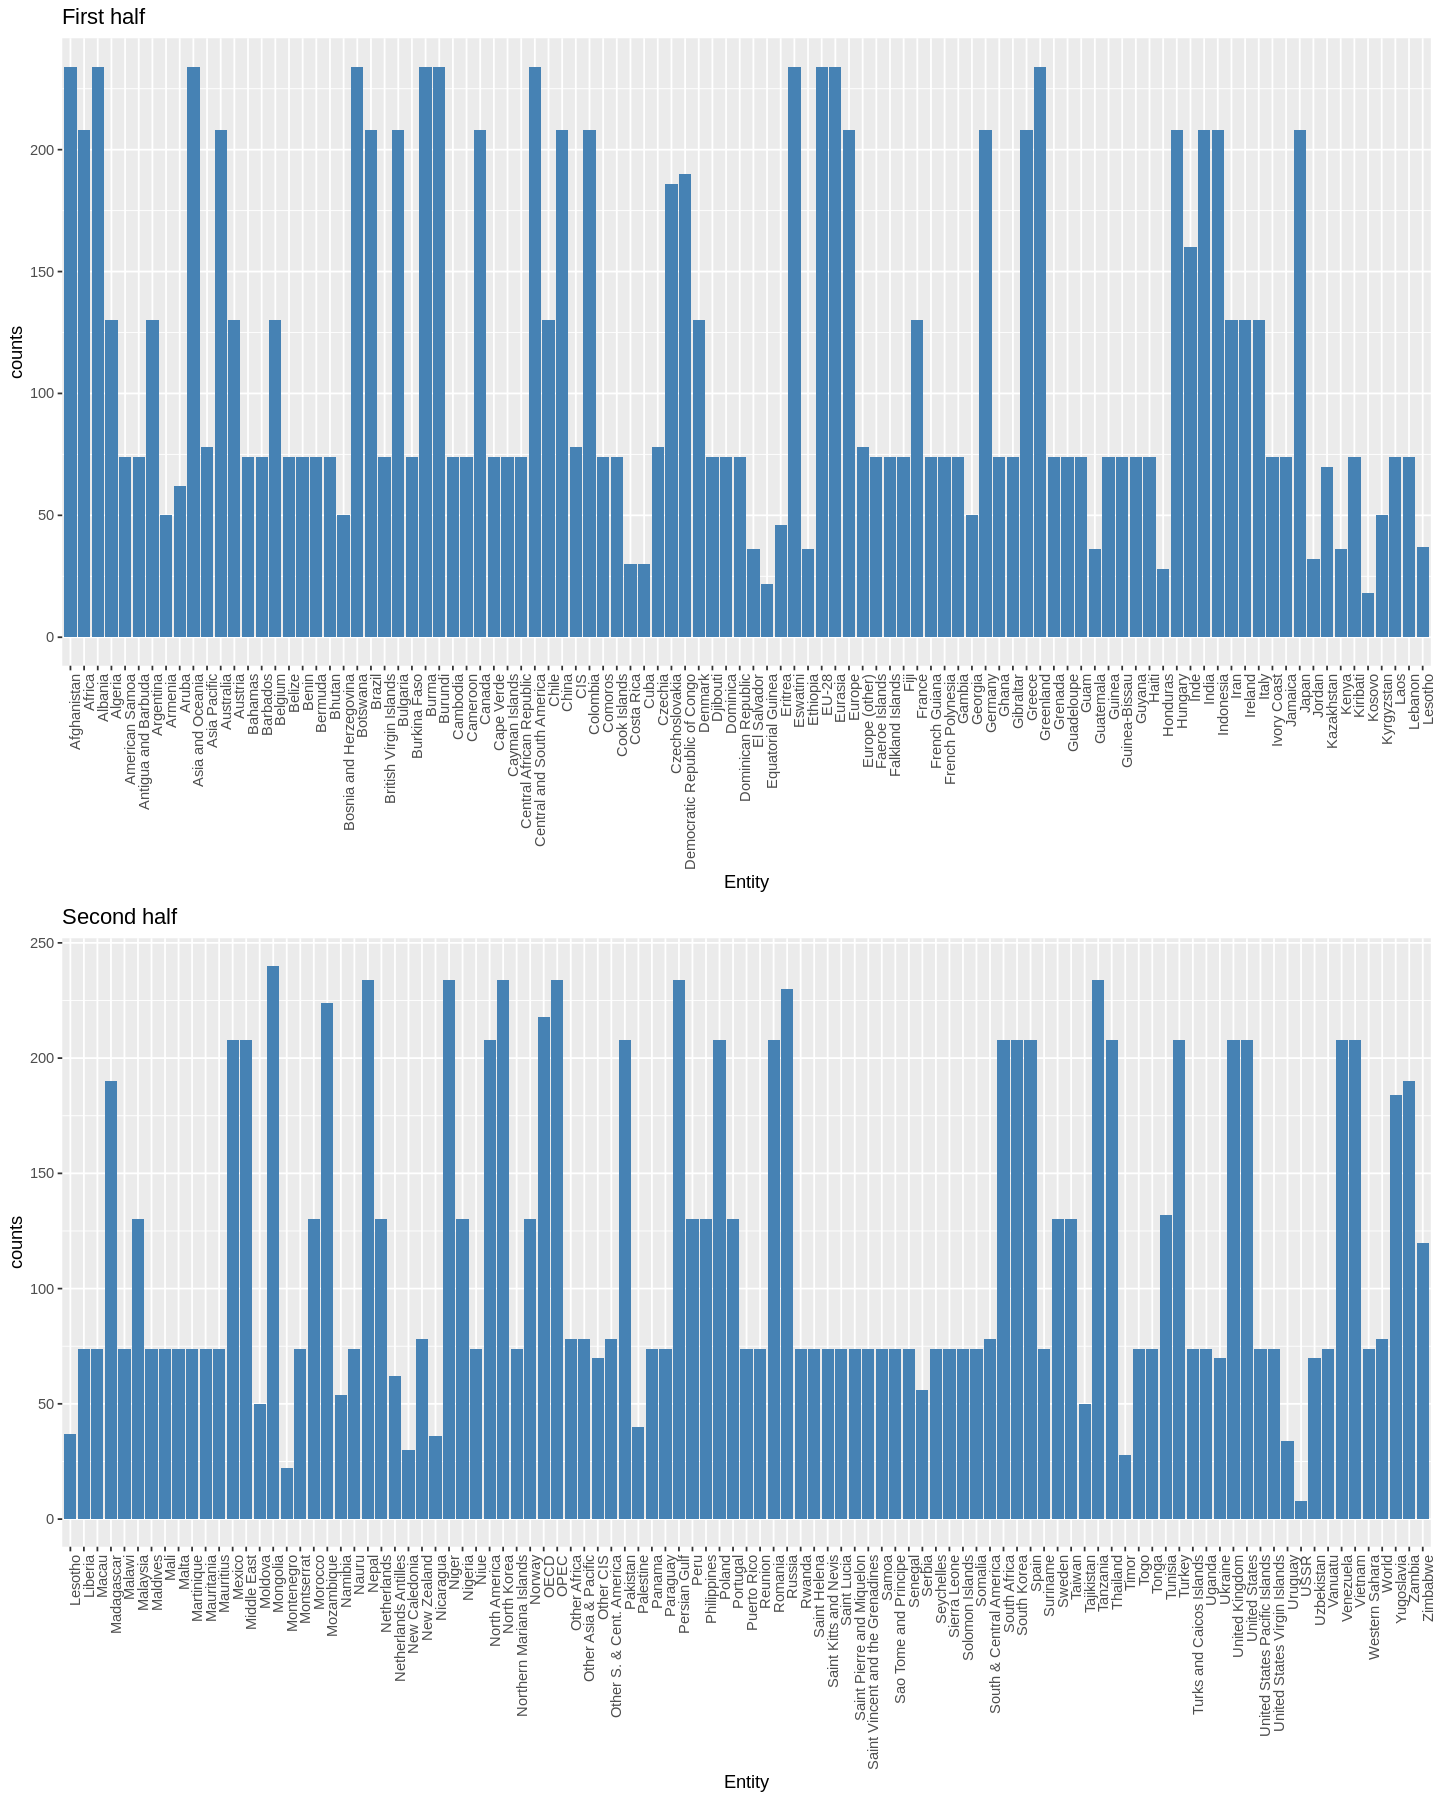

In [4]:
entries_per_country <- as.data.frame(table(dtibble$Entity))
colnames(entries_per_country) <- c('Entity', 'counts')
options(repr.plot.width=12, repr.plot.height=15)
nrows <- dim(entries_per_country)[1]


p1 <- ggplot(entries_per_country[1:nrows/2,], aes(Entity, counts)) + 
      geom_bar(stat='identity', fill='steelblue') +
      theme(axis.text.x=element_text(angle=90, hjust=1)) +
      ggtitle('First half')
p2 <- ggplot(entries_per_country[nrows/2+1:nrows/2,], aes(Entity, counts)) + 
      geom_bar(stat='identity', fill='steelblue') +
      theme(axis.text.x=element_text(angle=90, hjust=1)) +
      ggtitle('Second half')

grid.arrange(p1, p2, nrow = 2)

In [14]:
dtibble1970     <- dtibble[dtibble$Year >= 1970, ]
group_ent       <- aggregate(dtibble1970$Coal.production..TWh., list(dtibble1970$Entity), sum)
group_ent_order <- arrange(group_ent, desc(group_ent$x))
print("Top 5 countries:")
not_countries   <- c('World', 'Asia Pacific', 'Asia and Oceania', 'OECD', 'North America', 'Eurasia', 'EU-28', 'Europe', 'CIS')
print(group_ent_order[!group_ent_order$Group.1 %in% not_countries, ][1:5, ])
top_countries <- group_ent_order$Group.1[!group_ent_order$Group.1 %in% not_countries][1:5]

[1] "Top 5 countries:"
         Group.1         x
4          China 459564.65
7  United States 226068.84
11        Russia 101908.49
13     Australia  83077.07
14         India  77043.45


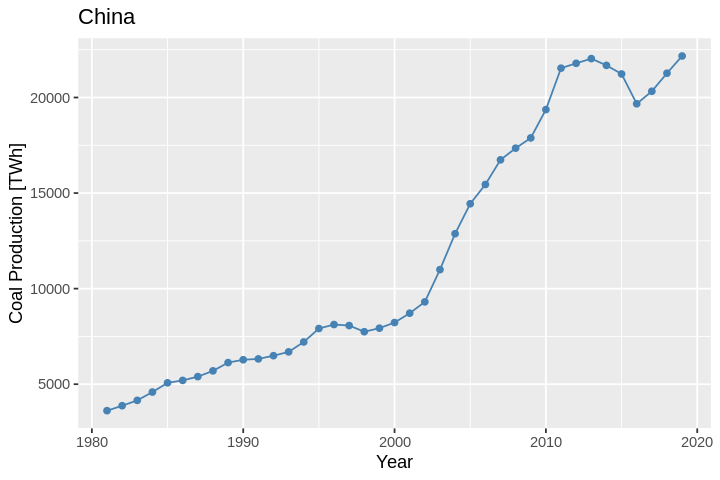

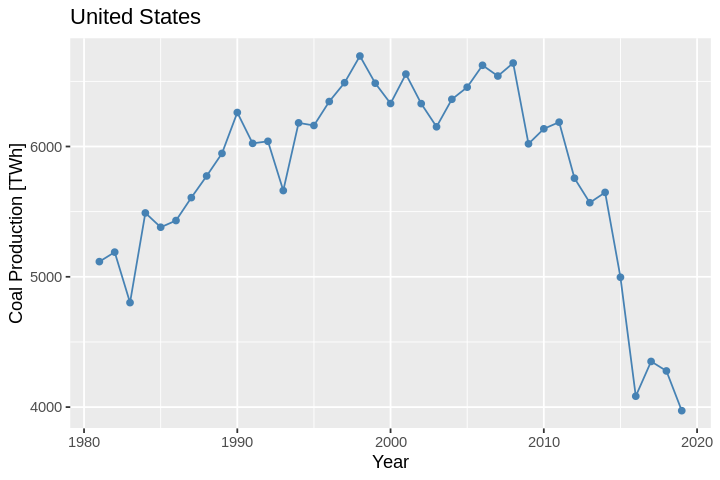

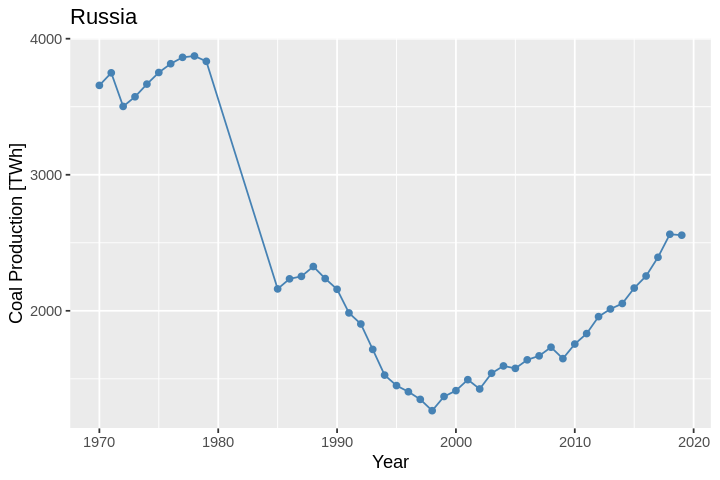

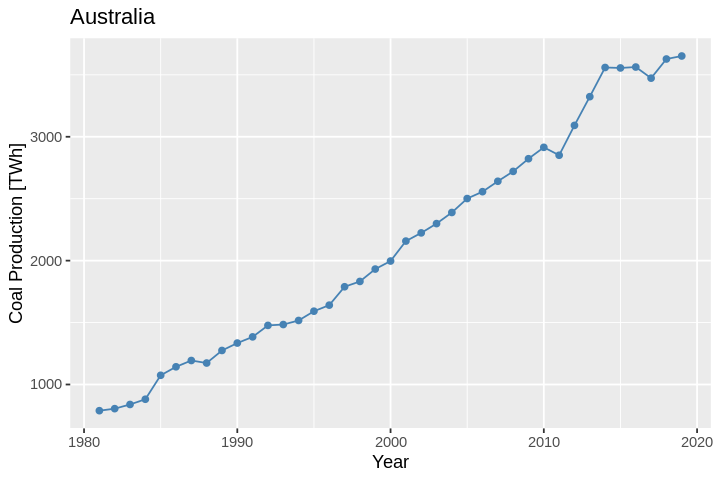

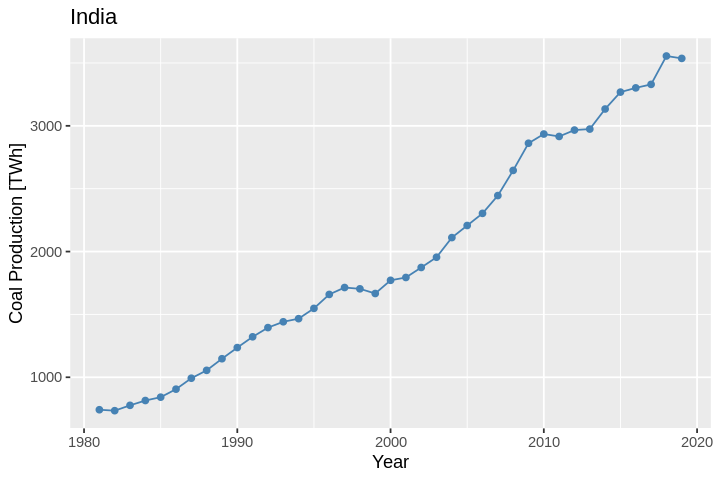

In [17]:
options(repr.plot.width=6, repr.plot.height=4)
for (entity in top_countries) {
    p <- ggplot(dtibble1970[dtibble1970$Entity == entity,], aes(Year, Coal.production..TWh.)) + 
         geom_point(color='steelblue') + geom_path(color='steelblue') + 
         ylab('Coal Production [TWh]') + ggtitle(entity)
    print(p)
}

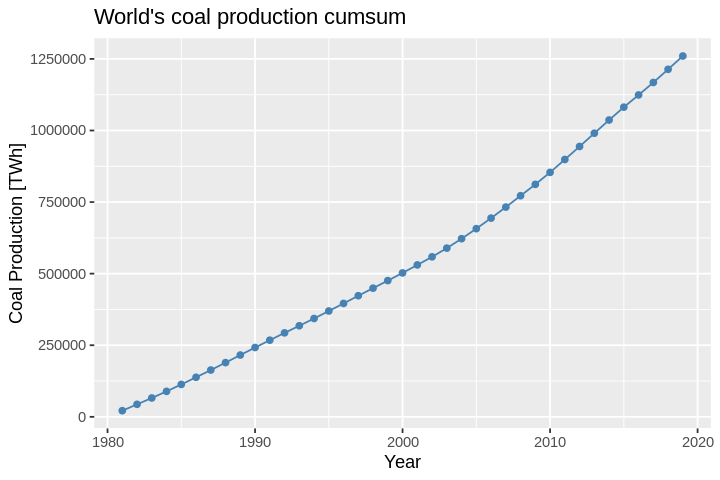

In [18]:
ggplot(dtibble1970[dtibble1970$Entity == 'World',], aes(Year, cumsum(Coal.production..TWh.))) + 
       geom_point(color='steelblue') + geom_path(color='steelblue') + 
       ylab('Coal Production [TWh]') + ggtitle("World's coal production cumsum")

## Ex 4 - Covid19 Vaccine data
### a)

In [43]:
data <- read_csv('vaccinations-by-manufacturer.csv')
print(head(data))

Rows: 36437 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): location, vaccine
dbl  (1): total_vaccinations
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 6 × 4
  location  date       vaccine            total_vaccinations
  <chr>     <date>     <chr>                           <dbl>
1 Argentina 2020-12-29 Moderna                             2
2 Argentina 2020-12-29 Oxford/AstraZeneca                  5
3 Argentina 2020-12-29 Sinopharm/Beijing                   1
4 Argentina 2020-12-29 Sputnik V                       20482
5 Argentina 2020-12-30 Moderna                             2
6 Argentina 2020-12-30 Oxford/AstraZeneca                  5


In [52]:
filter(data, vaccine=='Oxford/AstraZeneca', date>as.Date('2022-01-01'), location=='Italy')

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Italy,2022-01-11,Oxford/AstraZeneca,12165671


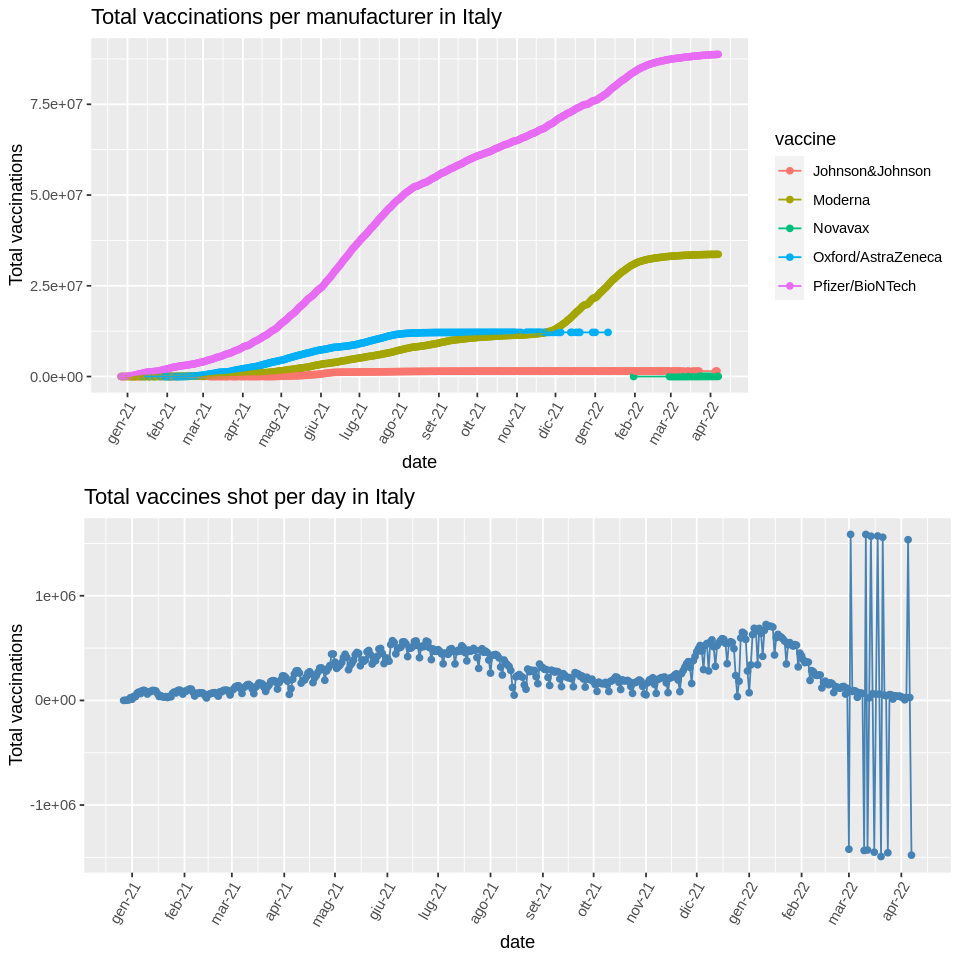

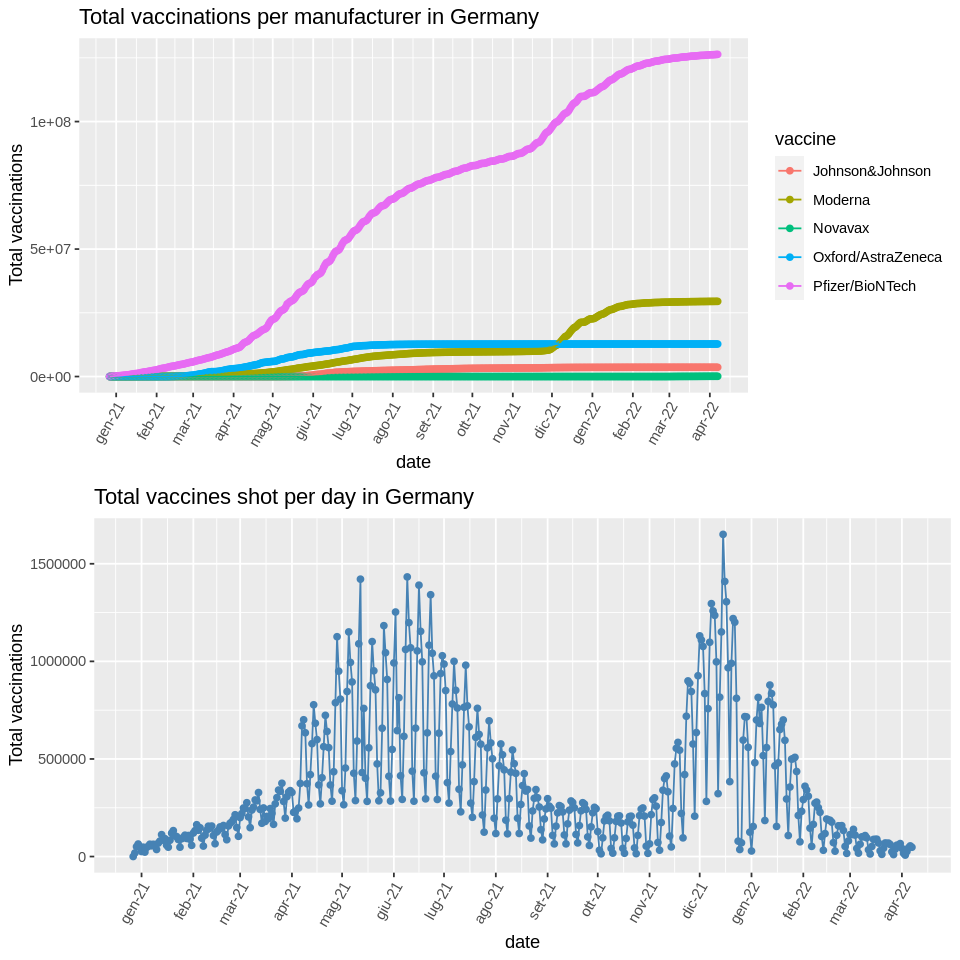

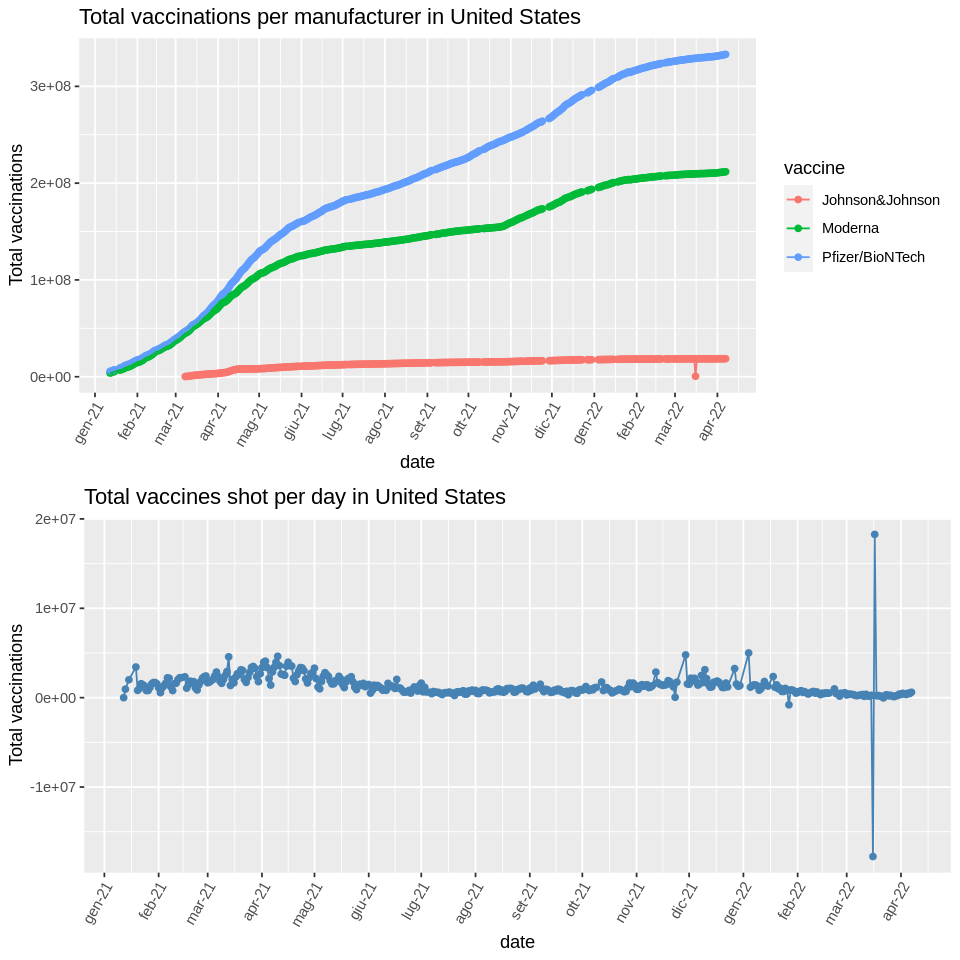

In [62]:
options(repr.plot.width=8, repr.plot.height=8)

cumdiff <- function(x) {sum(abs(diff(x)))}

for (country in c('Italy', 'Germany', 'United States')) {
       p1 <- ggplot(filter(data, location == country), aes(date, total_vaccinations, color=vaccine)) + 
             geom_point() + geom_path() + 
             ylab('Total vaccinations') + ggtitle(paste('Total vaccinations per manufacturer in', country)) +
             theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
             scale_x_date(date_breaks = "1 months", date_labels="%b-%y")

      # remove data from AstraZeneca as they are not continuous and cause problems
      if (country == 'Italy') {
            data_ <- mutate(filter(aggregate(total_vaccinations ~ date + location, data=data[data$vaccine!='Oxford/AstraZeneca',], sum), location == country), vaccinations_per_day = c(0, diff(total_vaccinations)))
      }
      else {
           data_ <- mutate(filter(aggregate(total_vaccinations ~ date + location, data=data, sum), location == country), vaccinations_per_day = c(0, diff(total_vaccinations))) 
      }                              

       p2 <- ggplot(data_, aes(date, vaccinations_per_day)) + 
             geom_point(color='steelblue') + geom_path(color='steelblue') + 
             ylab('Total vaccinations') + xlab('date') + ggtitle(paste('Total vaccines shot per day in', country)) +
             theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
             scale_x_date(date_breaks = "1 months", date_labels="%b-%y")

       grid.arrange(p1, p2, nrow = 2)
}


### b)

In [35]:
data <- read_csv('vaccinations.csv')
head(data)

Rows: 93947 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): location, iso_code
dbl  (13): total_vaccinations, people_vaccinated, people_fully_vaccinated, t...
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003


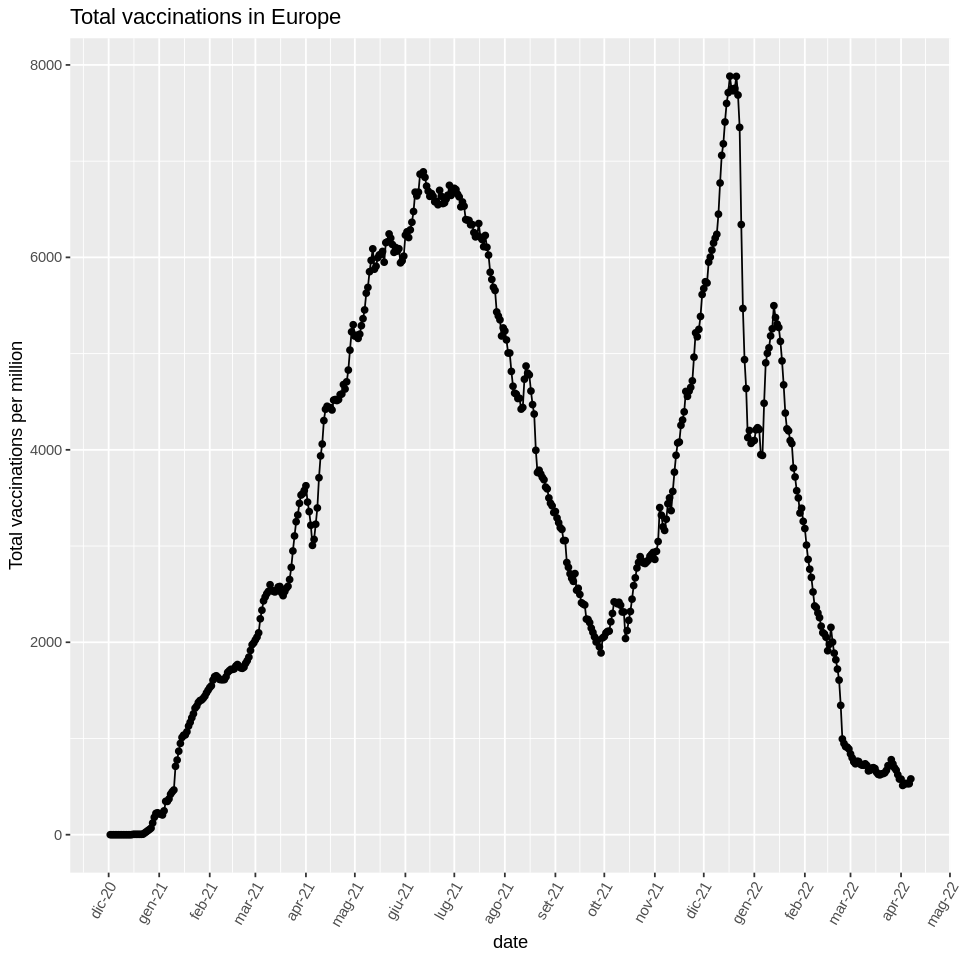

In [25]:
ggplot(filter(data, iso_code=='OWID_EUR'), aes(date, daily_vaccinations_per_million)) + 
geom_point() + geom_path() + 
ylab('Total vaccinations per million') + ggtitle('Total vaccinations in Europe') +
theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
scale_x_date(date_breaks = "1 months", date_labels="%b-%y")


Now we try to analyse vaccines data in order to determine if the wealth of a continent determines the number of vaccinations

Warning message:
“Removed 53 row(s) containing missing values (geom_path).”
Warning message:
“Removed 466 row(s) containing missing values (geom_path).”


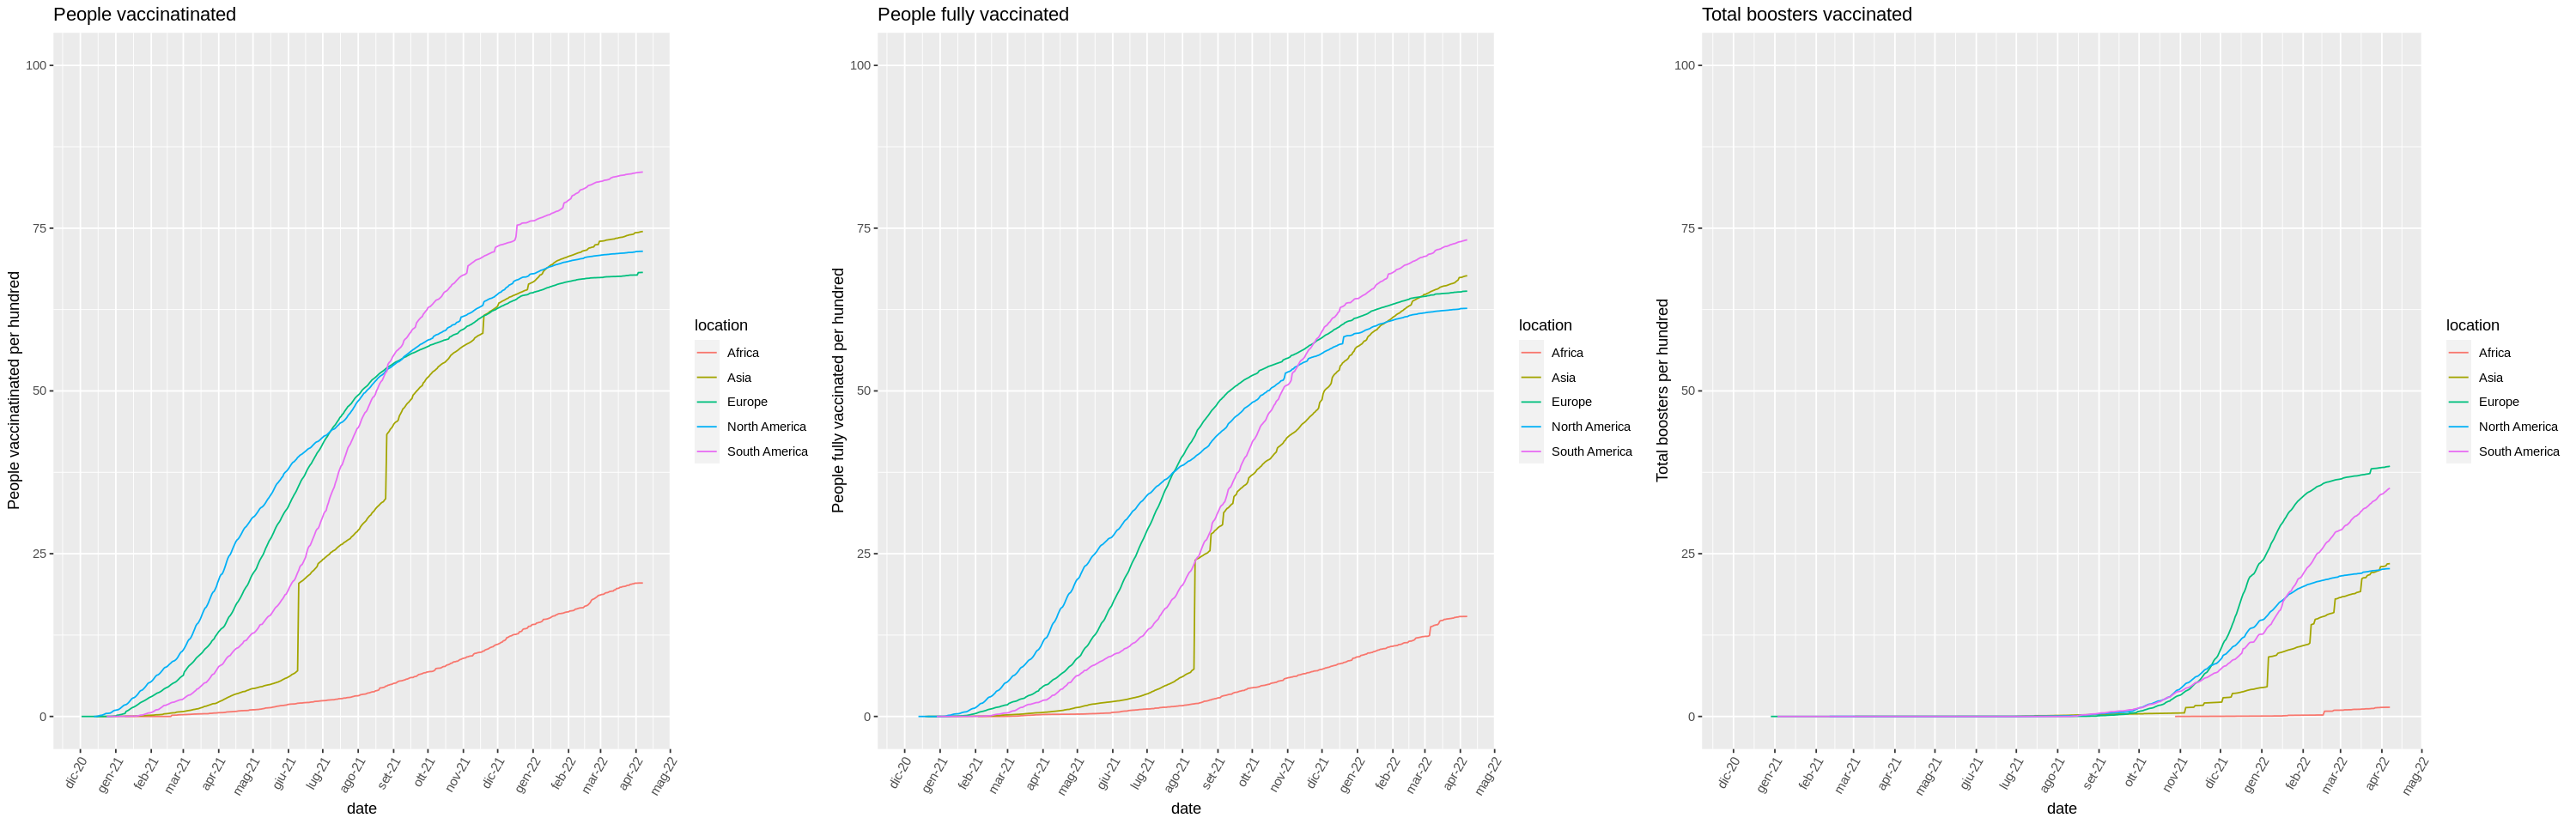

In [36]:
# select only continents
entities <- c("Europe", "Asia", "Africa", "North America", "South America")
data_ = data[data$location %in% entities, ]

options(repr.plot.width=25, repr.plot.height=8)

p1 <- ggplot(data=data_, aes(x=date, y=people_vaccinated_per_hundred, color=location)) +                                             
      geom_path() +                                                               
      ylab("People vaccinatinated per hundred") +
      ggtitle("People vaccinatinated") +
      theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
      scale_x_date(date_breaks = "1 months", date_labels="%b-%y") +
      ylim(0, 100)

p2 <- ggplot(data=data_, aes(x=date, y=people_fully_vaccinated_per_hundred, color=location)) +                                              
      geom_path() +                                                               
      ylab("People fully vaccinated per hundred") +
      ggtitle("People fully vaccinated") +
      theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
      scale_x_date(date_breaks = "1 months", date_labels="%b-%y") +
      ylim(0, 100) 


p3 <- ggplot(data=data_, aes(x=date, y=total_boosters_per_hundred, color=location)) +                                              
      geom_path() +                                                               
      ylab("Total boosters per hundred") +
      ggtitle("Total boosters vaccinated") +
      theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
      scale_x_date(date_breaks = "1 months", date_labels="%b-%y") +
      ylim(0, 100)

grid.arrange(p1, p2, p3,  nrow=1, widths=c(8, 8, 9))